# Программа визуализации расчетов 2D Уравнения Переноса

### Считывание рассчитанных значений из файла

In [1]:
def read2DOutput(filename):
    file = open(filename, "r")

    meshParamsLine = file.readline()
    cellCountX, cellCountY, dx = [float(val) for val in meshParamsLine.split("\t") if val != ""][:4]
    cellCountX = int(cellCountX)
    cellCountY = int(cellCountY)
    
    timeParamsLine = file.readline()
    NTimeSteps, realNTimeSteps, dt  = [float(val) for val in timeParamsLine.split("\t") if val != ""][:3]
    NTimeSteps = int(NTimeSteps)
    realNTimeSteps = int(realNTimeSteps)
    
    frames = []
    for i in range(realNTimeSteps+1):
        f = []
        for y in range(cellCountY):
            lineX = file.readline()
            fx = [float(fi) for fi in lineX.split("\t") if len(fi)>1 or fi.isnumeric()]
            f.append(fx)
        frames.append(f.copy())
    
    file.close()
    return cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames

In [2]:
from FoldersConfig import *

print(OutputDir)
print(CalculationResultsPath)
print(PlotOutputPath)

D:\Programing\C++\DigitalGeometry\Programs\Output
D:\Programing\C++\DigitalGeometry\Programs\Output\CalculationResults
D:\Programing\C++\DigitalGeometry\Programs\Output\GraphicsResults


In [3]:
cellCountX, cellCountY, dx, NTimeSteps, realNTimeSteps, dt, frames = read2DOutput(downDir(CalculationResultsPath, "Solve2DWhiteBearMovementTest.txt"))

In [4]:
print("cellCountX: ", cellCountX)
print("cellCountY: ", cellCountY)
print("dx: ", dx)
print("NTimeSteps: ", NTimeSteps)
print("realNTimeSteps: ", realNTimeSteps)
print("dt: ", dt)

cellCountX:  128
cellCountY:  128
dx:  0.0078125
NTimeSteps:  400
realNTimeSteps:  50
dt:  0.015625


In [5]:
import matplotlib.pyplot as plt

In [6]:
def lowValueHighlighter(f):
    fh = []
    for y in range(len(f)):
        fh.append([])
        for x in range(len(f[y])):
            fh[y].append(pow(f[y][x], 0.125))
    return fh

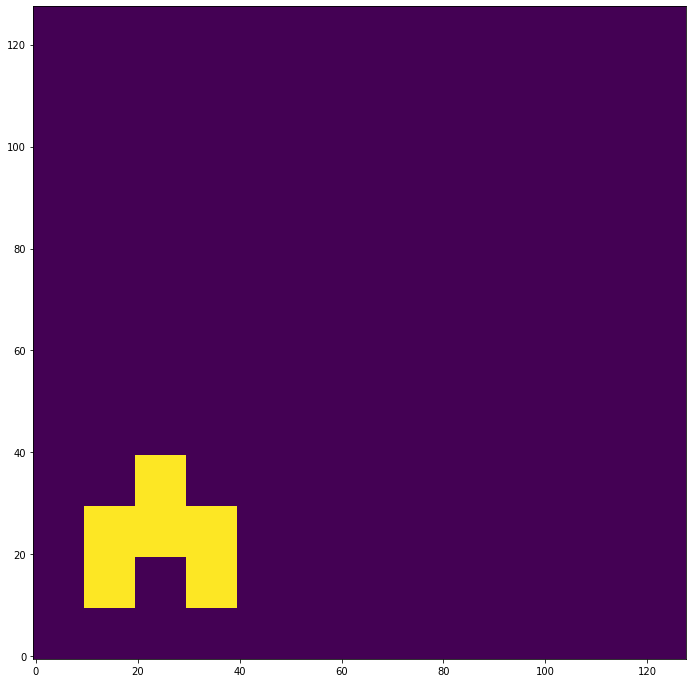

In [7]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(lowValueHighlighter(frames[0]), origin='lower')

In [8]:
from celluloid import Camera

MovieWriter PillowWriter unavailable; using Pillow instead.


Animation real time:  6.25
Animation real time step:  0.25
Animation fps:  4.0


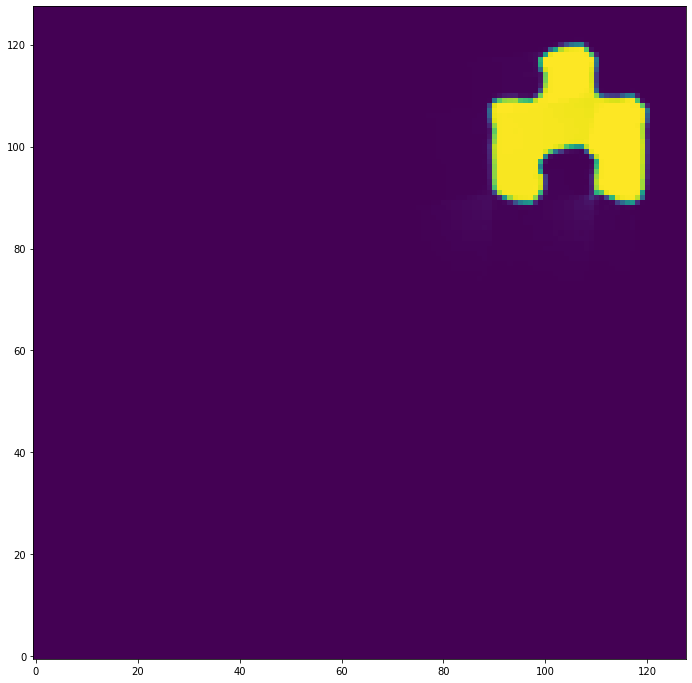

In [10]:
fig = plt.figure(figsize=(12, 12))
camera = Camera(fig)
for frame in frames:
    plt.imshow(frame, origin='lower')
    #plt.imshow(lowValueHighlighter(frame), origin='lower')
    camera.snap()
animation = camera.animate()

slowmo = 2
time = dt * NTimeSteps
print("Animation real time: ", time)
realTimeStep = time / realNTimeSteps * slowmo
print("Animation real time step: ", realTimeStep)
fps = 1 / realTimeStep
print("Animation fps: ", fps)

animation.save(downDir(PlotOutputPath, 'animation2D.gif'), writer='PillowWriter', fps=fps)